# ANGGOTA KELOMPOK :


1.   Fijar Yasmina Pritama	1301200215
2.   Razita Amalina		1301200283





# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

# IMPORT DATA

Data yang digunakan adalah dataset Breast Cancer Wisconsin 
(Diagnostic). Dataset ini terdiri dari data train dan data test. Library pandas diperlukan untuk proses membaca dan memproses dataset pada program ini.

In [ ]:

#import data train
!gdown --id 1oB1Dh0lZuTkvTxZoAtbqJeMSqd8BKdhr

#import data test
!gdown --id 1AY8aXyuxJwTcWxH6cvNAv1xaLK64O1Lq

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oB1Dh0lZuTkvTxZoAtbqJeMSqd8BKdhr
To: /content/test.csv
100% 23.3k/23.3k [00:00<00:00, 29.0MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AY8aXyuxJwTcWxH6cvNAv1xaLK64O1Lq
To: /content/train.csv
100% 102k/102k [00:00<00:00, 92.0MB/s]


In [ ]:
# making data frame of data train and data test with pandas
df_train = pd.read_csv("train.csv", na_values = '?')
df_test = pd.read_csv("test.csv")

## Informasi data train

In [ ]:
df_train.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       463 non-null    int64  
 1   diagnosis                463 non-null    object 
 2   radius_mean              463 non-null    float64
 3   texture_mean             463 non-null    float64
 4   perimeter_mean           463 non-null    float64
 5   area_mean                463 non-null    float64
 6   smoothness_mean          463 non-null    float64
 7   compactness_mean         463 non-null    float64
 8   concavity_mean           456 non-null    float64
 9   concave points_mean      456 non-null    float64
 10  symmetry_mean            463 non-null    float64
 11  fractal_dimension_mean   463 non-null    float64
 12  radius_se                463 non-null    float64
 13  texture_se               463 non-null    float64
 14  perimeter_se             4

In [ ]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,463.0,3.072130e+07,1.248655e+08,8670.000000,865280.000000,897880.000000,8.910720e+06,9.112962e+08
radius_mean,463.0,2.366673e+02,4.224021e+03,8.196000,11.800000,13.480000,1.615000e+01,9.000000e+04
texture_mean,463.0,1.951575e+01,8.978351e+00,9.710000,16.070000,18.770000,2.168000e+01,1.900000e+02
perimeter_mean,463.0,9.278639e+01,2.439204e+01,43.790000,75.485000,86.910000,1.064500e+02,1.885000e+02
area_mean,463.0,6.662950e+02,3.561670e+02,143.500000,427.950000,559.200000,8.041000e+02,2.501000e+03
smoothness_mean,463.0,9.634058e-02,1.369239e-02,0.062510,0.086580,0.096100,1.053500e-01,1.447000e-01
compactness_mean,463.0,1.046333e-01,5.384442e-02,0.019380,0.064130,0.092180,1.305500e-01,3.454000e-01
concavity_mean,456.0,9.261361e-02,8.118428e-02,0.000692,0.029878,0.067780,1.356000e-01,4.268000e-01
concave points_mean,456.0,5.101261e-02,3.918427e-02,0.001852,0.020688,0.035875,7.760250e-02,2.012000e-01
symmetry_mean,463.0,1.821162e-01,2.802311e-02,0.116700,0.162100,0.180000,1.965000e-01,3.040000e-01


## Informasi Data Test

In [ ]:
df_test.head(3)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,911320501,11.60,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.01777,0.1516,...,12.77,24.02,82.68,495.1,0.1342,0.1808,0.1860,0.08288,0.3210,0.07863
1,911320502,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.1876,0.10450,0.2235,0.06925
2,9113239,13.24,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.02833,0.1601,...,15.44,25.50,115.00,733.5,0.1201,0.5646,0.6556,0.13570,0.2845,0.12490


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       106 non-null    int64  
 1   radius_mean              106 non-null    float64
 2   texture_mean             106 non-null    float64
 3   perimeter_mean           106 non-null    float64
 4   area_mean                106 non-null    float64
 5   smoothness_mean          106 non-null    float64
 6   compactness_mean         106 non-null    float64
 7   concavity_mean           106 non-null    float64
 8   concave points_mean      106 non-null    float64
 9   symmetry_mean            106 non-null    float64
 10  fractal_dimension_mean   106 non-null    float64
 11  radius_se                106 non-null    float64
 12  texture_se               106 non-null    float64
 13  perimeter_se             106 non-null    float64
 14  area_se                  1

In [ ]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,106.0,2.884536e+07,1.262798e+08,91227.000000,914071.750000,919546.000000,925544.250000,9.113205e+08
radius_mean,106.0,1.359878e+01,3.437080e+00,7.691000,11.495000,13.010000,14.855000,2.463000e+01
texture_mean,106.0,1.996783e+01,4.680723e+00,11.280000,16.590000,19.550000,22.647500,3.062000e+01
perimeter_mean,106.0,8.839887e+01,2.367094e+01,47.920000,73.907500,84.170000,96.322500,1.655000e+02
area_mean,106.0,6.050689e+02,3.296871e+02,170.400000,403.050000,525.600000,680.850000,1.841000e+03
smoothness_mean,106.0,9.644632e-02,1.565484e-02,0.052630,0.085088,0.095030,0.104875,1.634000e-01
compactness_mean,106.0,1.030640e-01,4.826571e-02,0.033980,0.067015,0.096870,0.126825,2.770000e-01
concavity_mean,106.0,7.825476e-02,7.153486e-02,0.000000,0.030793,0.052275,0.102675,3.514000e-01
concave points_mean,106.0,4.314380e-02,3.576638e-02,0.000000,0.020917,0.030680,0.053027,1.520000e-01
symmetry_mean,106.0,1.769934e-01,2.426178e-02,0.106000,0.160400,0.172450,0.191575,2.397000e-01


# DATA PREPARATION

## Mengkonversi Kolom Diagnosis (Data Formatting)

Kolom Diagnosis pada data train (df_train) memiliki tipe object. Oleh karena itu, kami akan merubahnya menjadi tipe integer supaya mempermudah proses prediksi

Kolom Diagnosis memiliki 2 label untuk mengategorikan jenis kanker payudara: 
1.  B => benign (kanker jinak)
2. M => malignant (kanker ganas)

Dengan konversi kolom object menjadi tipe integer maka hasilnya akan menjadi seperti ini :
1. B => 0
2. M => 1

In [ ]:
convert_diagnosis = {'M':1,'B':0}
df_train['diagnosis'] = df_train['diagnosis'].map(convert_diagnosis)
df_train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
2,84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
3,84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
4,84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,9112594,0,13.000,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,...,14.34,31.88,91.06,628.5,0.1218,0.1093,0.04462,0.05921,0.2306,0.06291
459,9112712,0,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,...,10.67,36.92,68.03,349.9,0.1110,0.1109,0.07190,0.04866,0.2321,0.07211
460,911296201,1,17.080,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,...,22.96,34.49,152.10,1648.0,0.1600,0.2444,0.26390,0.15550,0.3010,0.09060
461,911296202,1,27.420,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.68330,0.26250,0.2641,0.07427


In [ ]:
df_train.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

# Data Preprocessing

##Checking and Removing Missing Value in Data Train

In [ ]:
df_train.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             7
concave points_mean        7
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               7
concave points_se          7
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            7
concave points_worst       7
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
tabel_missing_value = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
tabel_missing_value

,column_name,percent_missing
id,id,0.000000
diagnosis,diagnosis,0.000000
radius_mean,radius_mean,0.000000
texture_mean,texture_mean,0.000000
perimeter_mean,perimeter_mean,0.000000
area_mean,area_mean,0.000000
smoothness_mean,smoothness_mean,0.000000
compactness_mean,compactness_mean,0.000000
concavity_mean,concavity_mean,1.511879
concave points_mean,concave points_mean,1.511879


In [ ]:
#replace missing value with mean

df_train.fillna(df_train.mean(numeric_only=True).round(1), inplace=True)
df_train.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Mengecek Pencilan

<ipython-input-15-00dd13df8d09>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


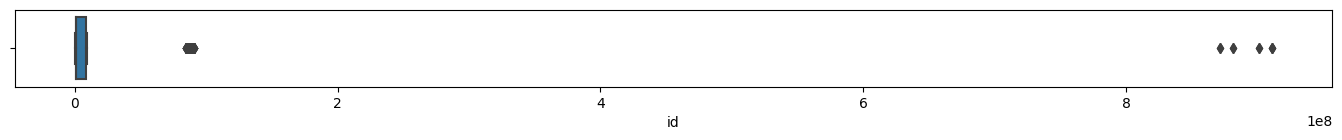

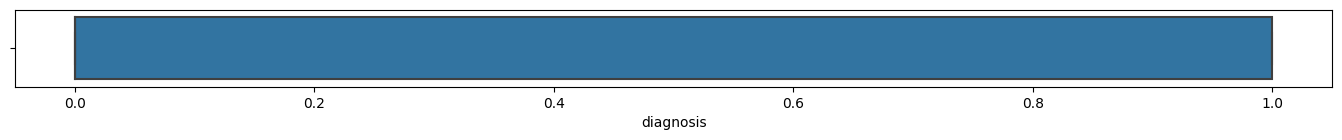

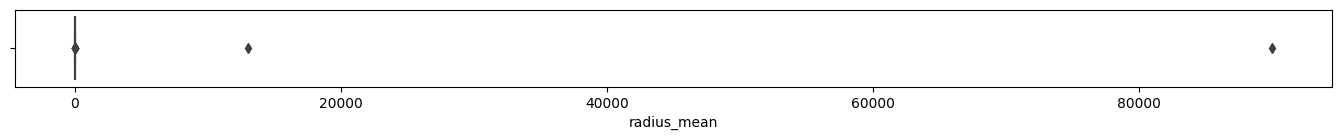

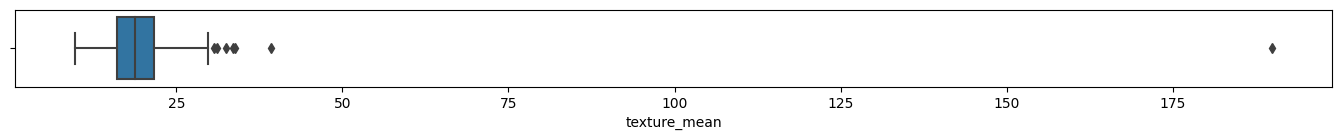

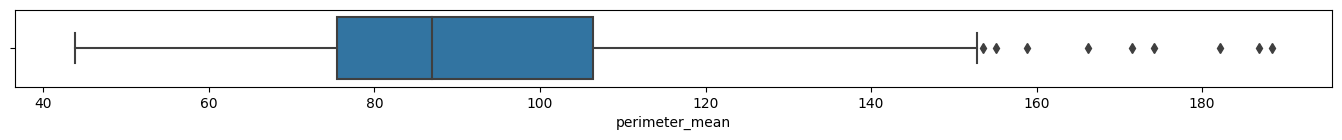

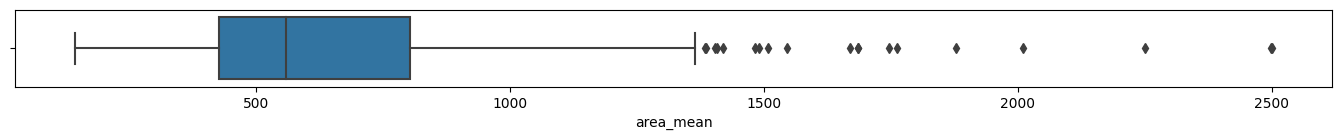

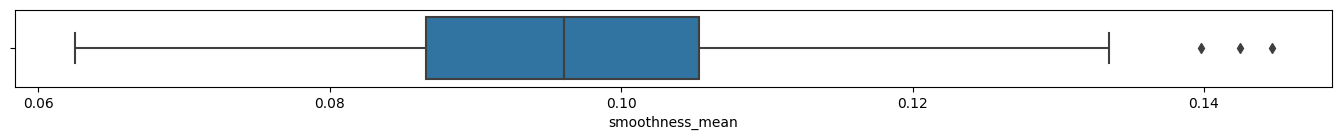

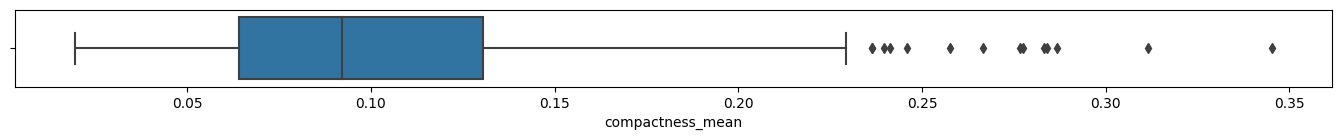

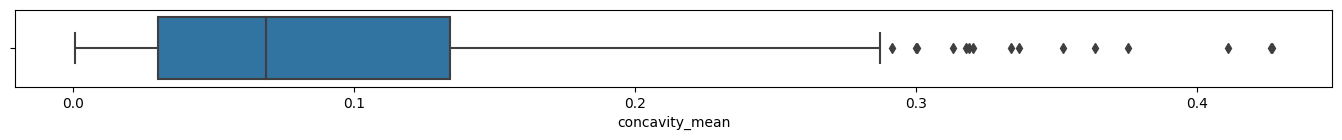

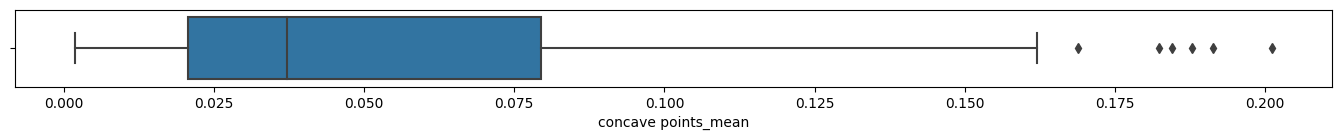

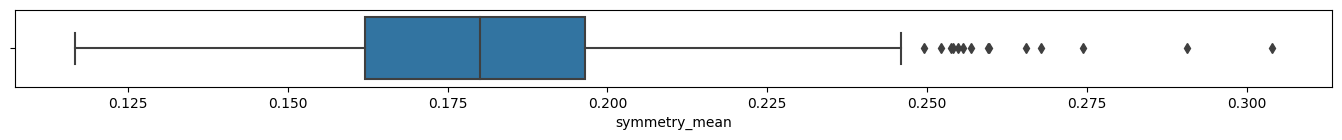

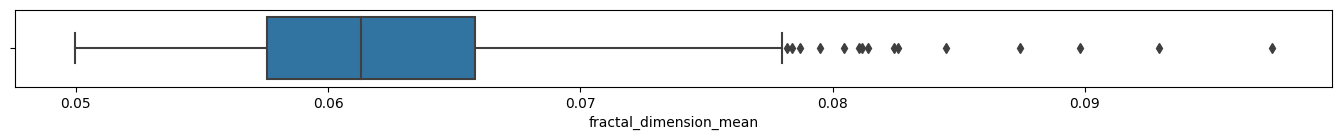

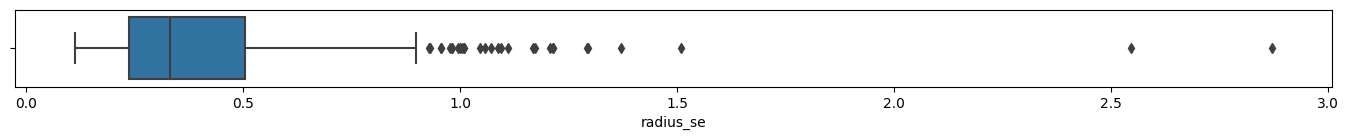

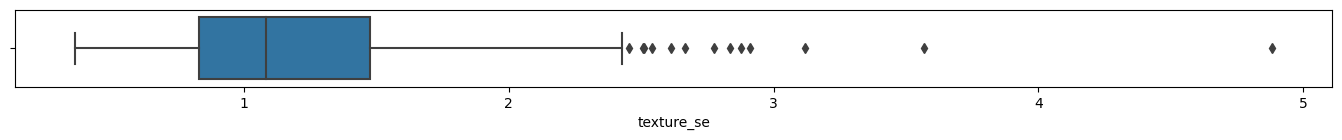

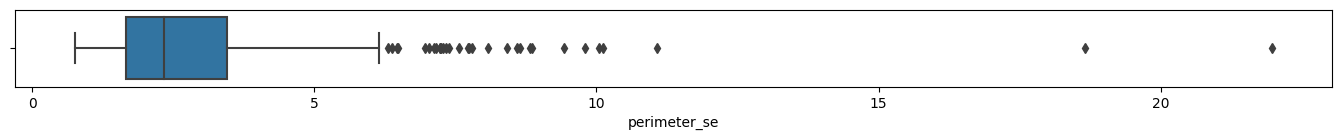

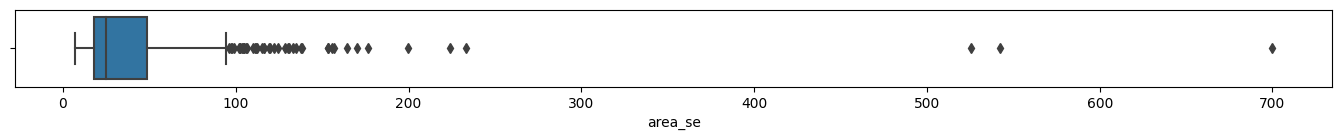

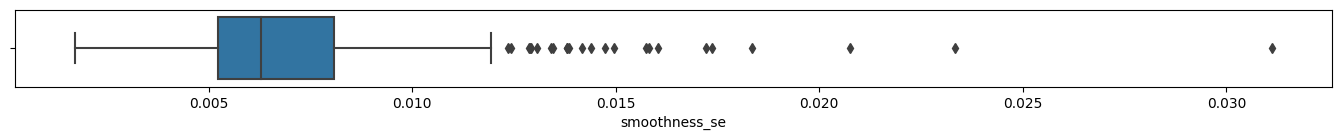

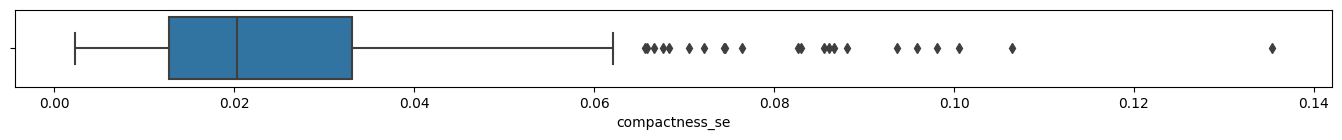

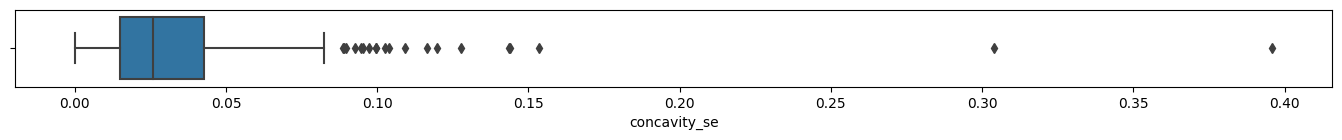

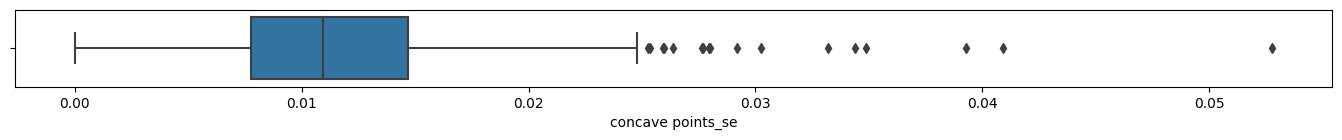

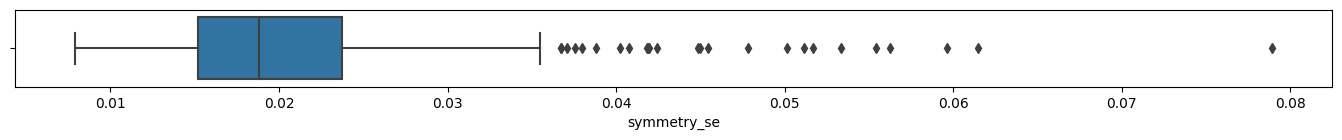

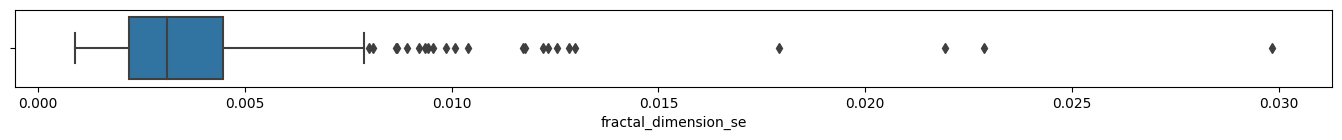

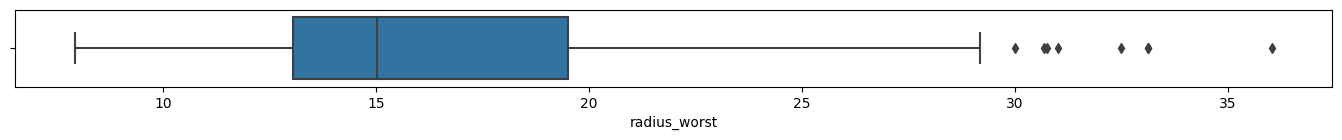

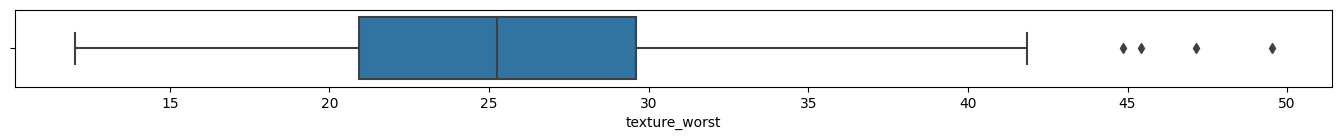

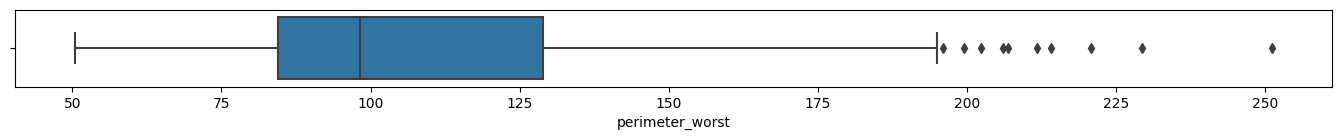

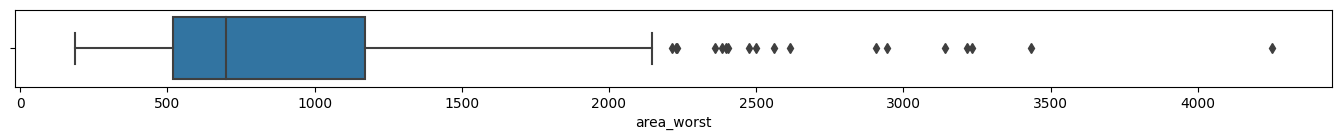

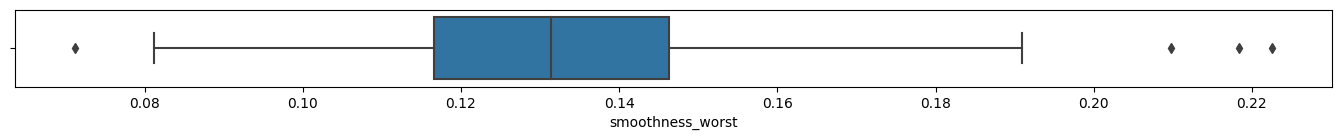

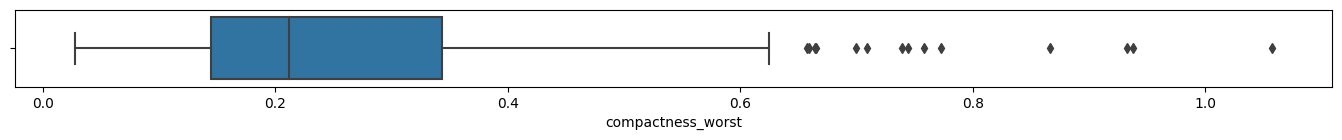

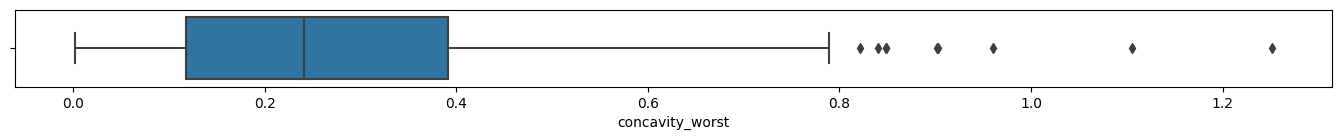

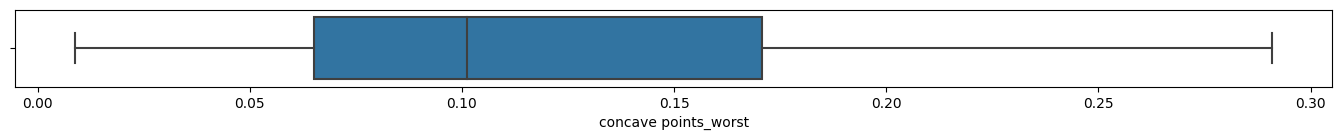

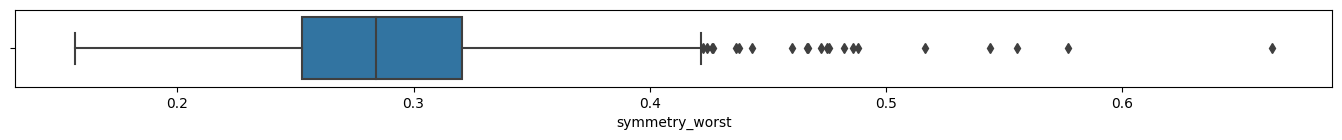

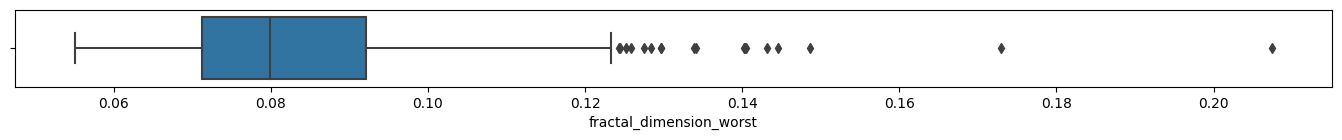

In [ ]:
#menampilkan box plot
for column in df_train:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_train, x=column)

## Menghilangkan Outliers

In [ ]:
def InterQuartile(data_frame):
  for i in data_frame.columns:
    q1 = data_frame[i].quantile(0.25)
    q3 = data_frame[i].quantile(0.75)
    inter_quartile_range = q3-q1

    terkecil = q1 - (inter_quartile_range *1.5) 
    terbesar = q3 + (inter_quartile_range * 1.5)

    data_frame.loc[data_frame[i] > terbesar , i] = terbesar 
    data_frame.loc[data_frame[i] < terkecil , i] = terkecil

InterQuartile(df_train)


<ipython-input-17-4d86ec5179bb>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


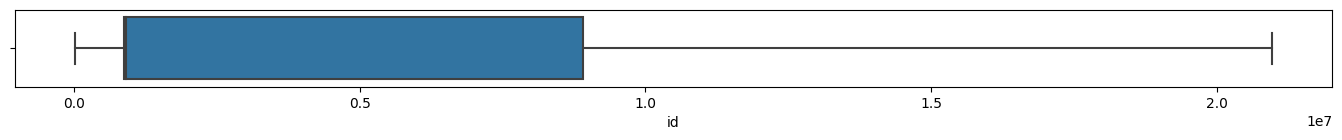

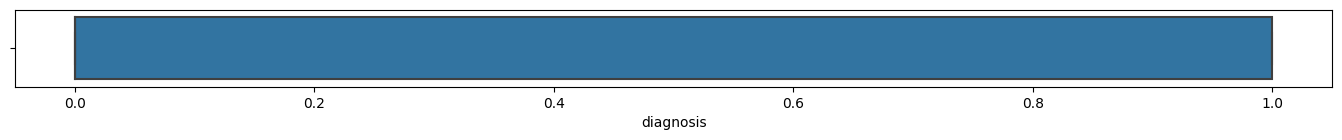

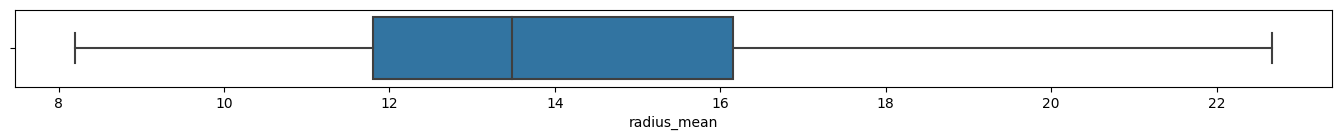

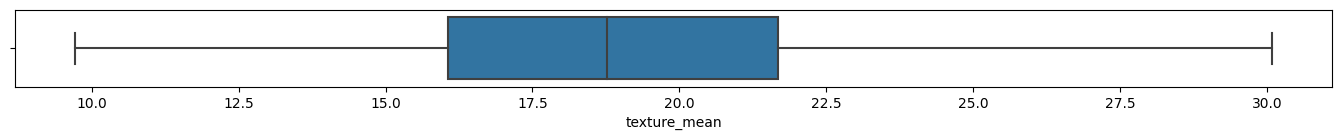

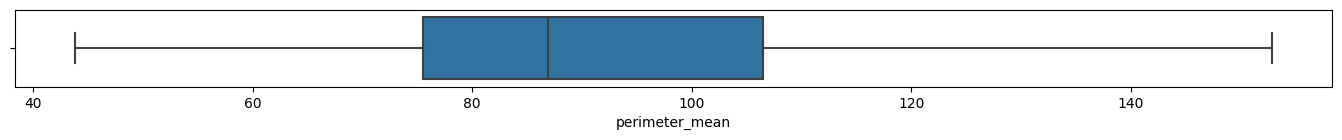

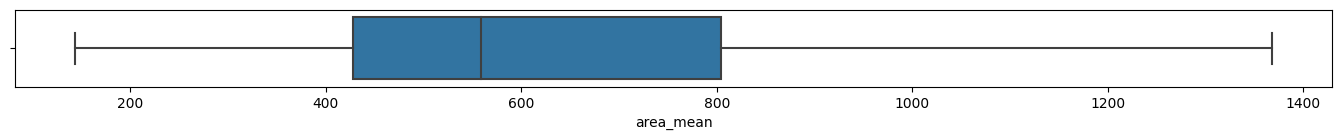

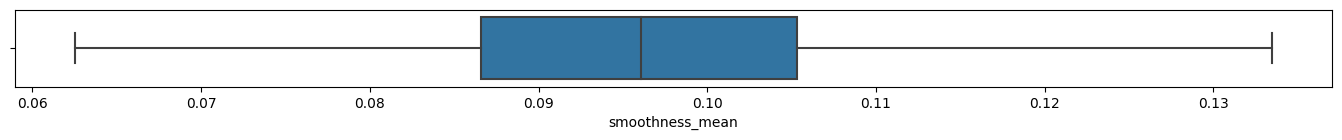

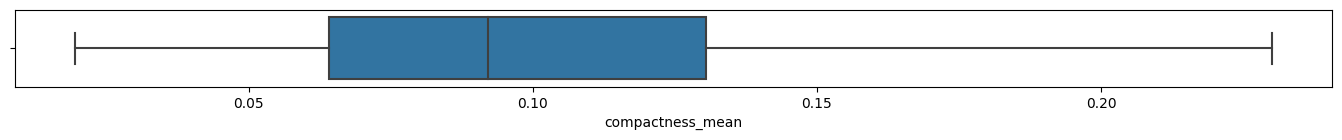

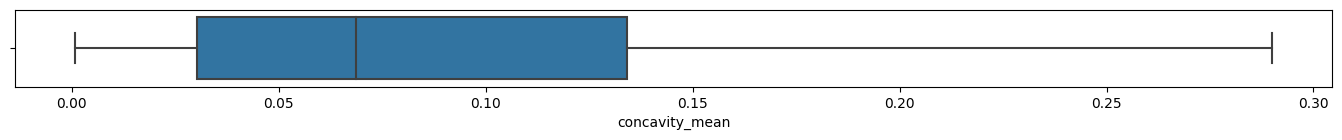

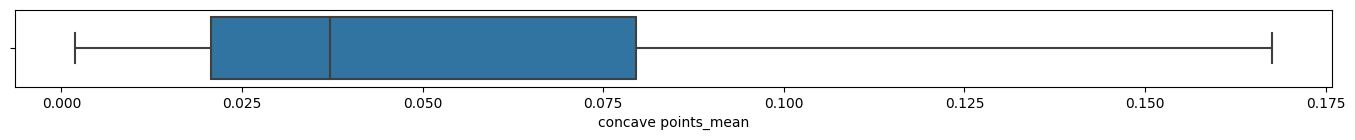

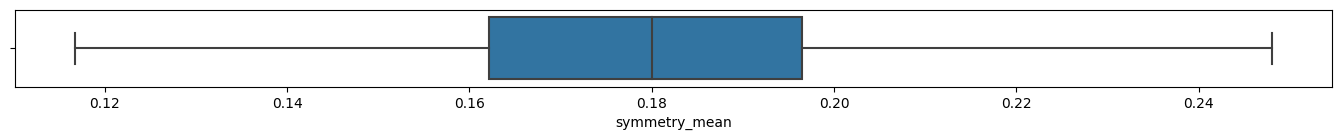

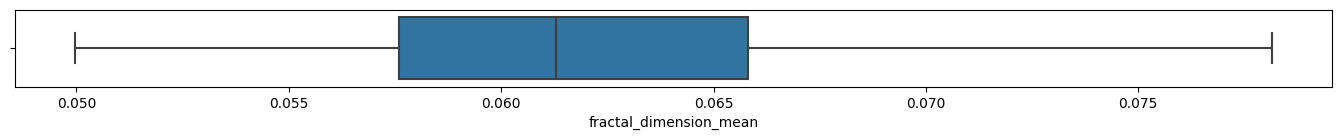

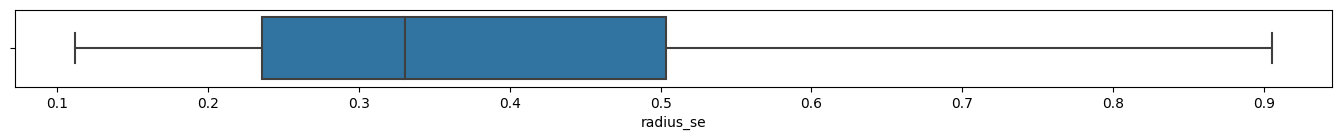

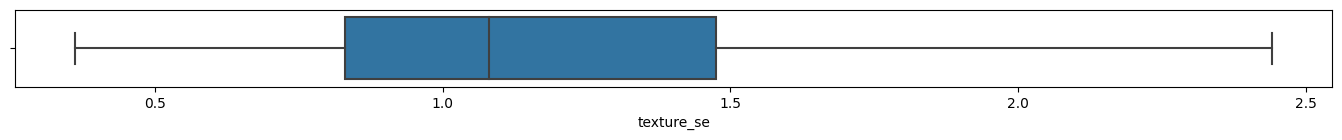

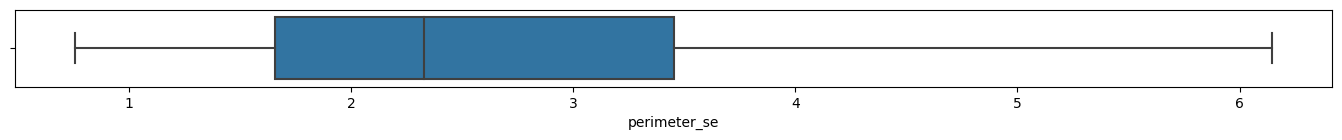

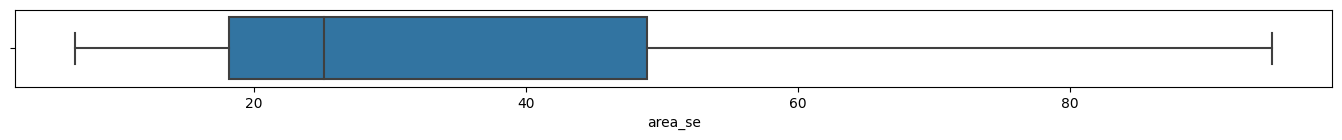

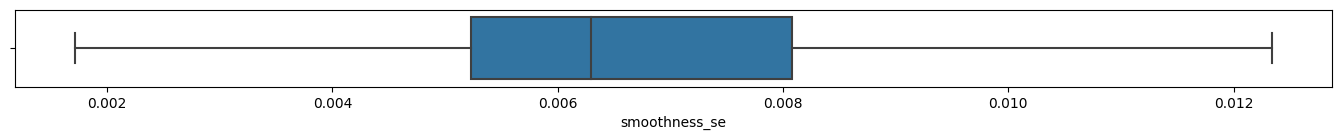

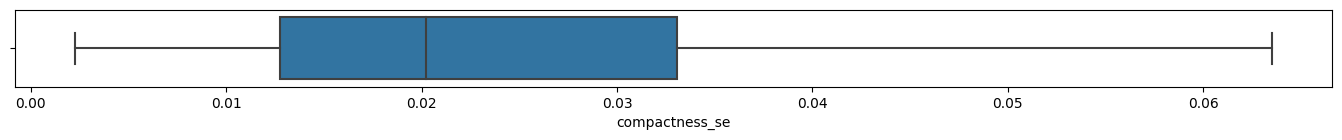

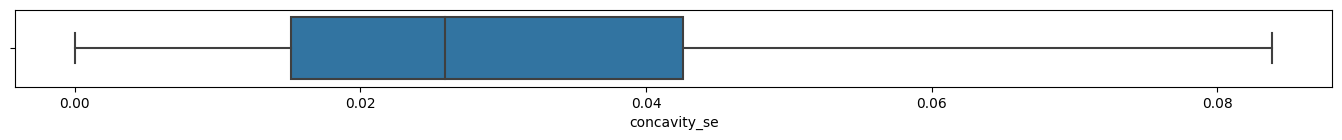

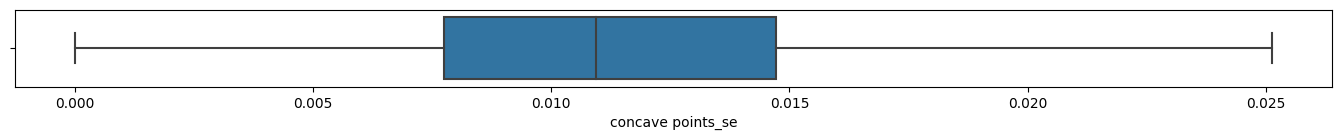

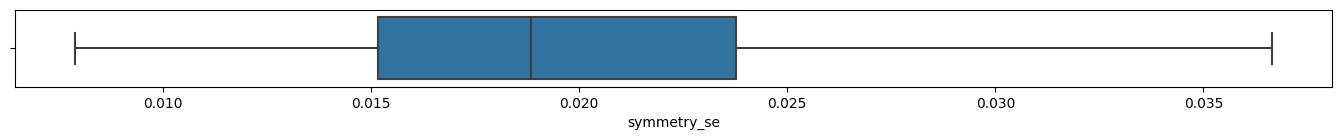

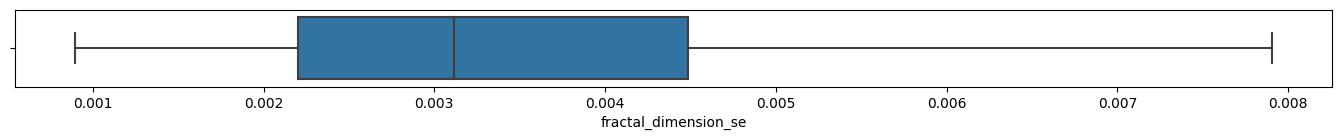

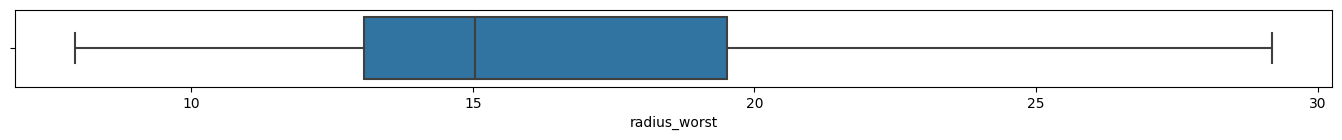

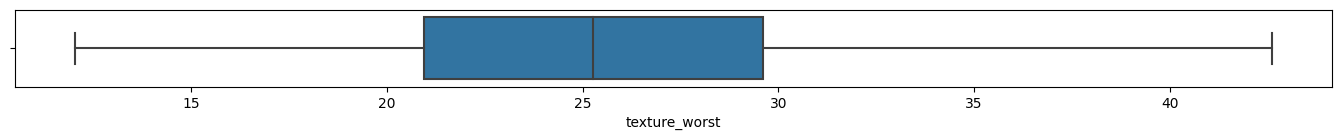

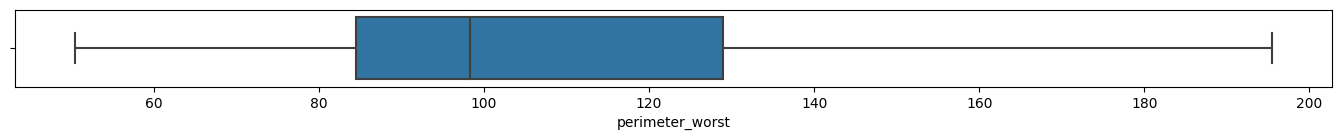

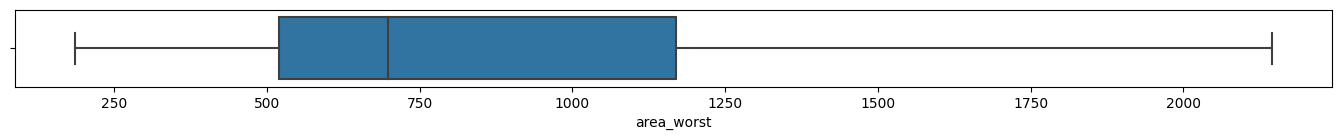

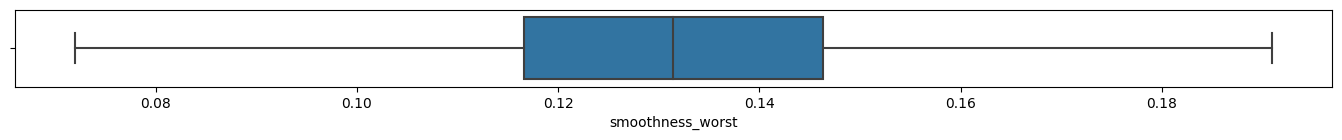

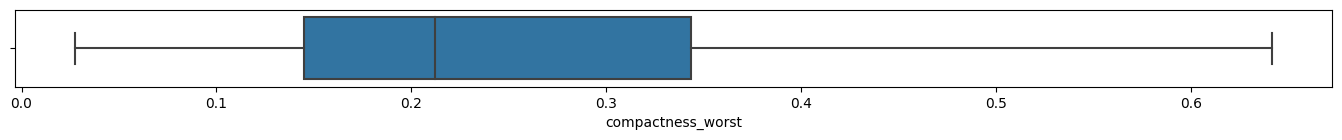

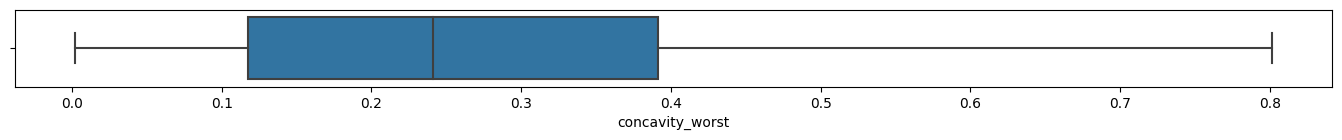

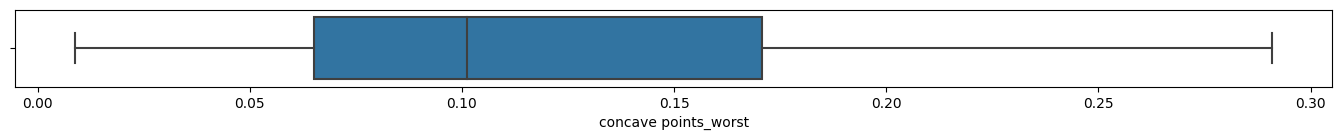

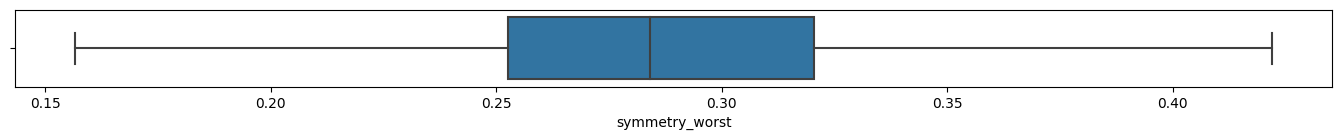

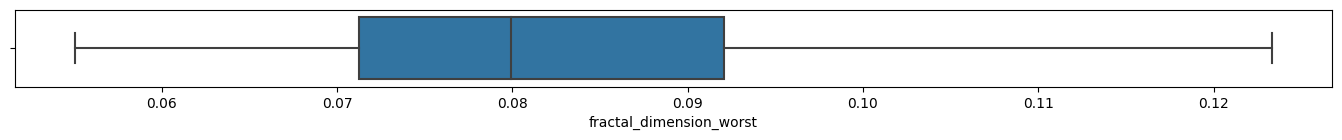

In [ ]:
#menampilkan box plot setelah menghilangkan pencilan dengan metode inter quartile range
for column in df_train:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df_train, x=column)

In [ ]:
#menyimpan file data train setelah proses prepocessing
df_train.to_csv('data_train_prepocessed.csv')

# Eksperimen

Pada bagian experimen, proses split data train sebesar 75% dan data test sebesar 25% dengan variabel random state 32. Experimen ini akan memprediksi kolom diagnosis

In [ ]:
x = df_train.drop(['diagnosis'], axis = 1)
y = df_train['diagnosis'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=32)

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
458    0
459    0
460    1
461    1
462    0
Name: diagnosis, Length: 463, dtype: int64

### Proses pembuatan model data menggunakan AUTO ML yaitu TPOT.

In [ ]:
!pip install TPOT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=10, population_size=20, cv=5, n_jobs=2, random_state=42, verbosity=2)

In [ ]:
tpot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9756756756756756

Generation 2 - Current best internal CV score: 0.9756756756756756


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIt


Generation 3 - Current best internal CV score: 0.9756756756756756

Generation 4 - Current best internal CV score: 0.9756756756756756

Generation 5 - Current best internal CV score: 0.9756756756756756


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/training.py", line 185, in train
    bst.update(dtrain, i, obj)
  File "/usr/local/lib/python3.9/dist-packages/xgboost/core.py", line 1918, in update
    _check_call(_LIB.XGBoosterUpdateOneIt


Generation 6 - Current best internal CV score: 0.981081081081081

Generation 7 - Current best internal CV score: 0.981081081081081

Generation 8 - Current best internal CV score: 0.981081081081081

Generation 9 - Current best internal CV score: 0.981081081081081

Generation 10 - Current best internal CV score: 0.981081081081081

Best pipeline: MLPClassifier(Normalizer(StandardScaler(input_matrix), norm=max), alpha=0.001, learning_rate_init=0.01)


TPOTClassifier(generations=10, n_jobs=2, population_size=20, random_state=42,
               verbosity=2)

In [ ]:
tpot.export('tpot_hasil_pipeline.py')

### Prediksi kolom diagnosis pada data test

In [ ]:
y_diagnosis_pred = tpot.predict(x_test)
y_diagnosis_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1])

# Evaluasi dengan Confussion Metrics

In [ ]:
nilaiEvaluasi = []

nilaiEvaluasi.append(['Eksperimen', metrics.f1_score(y_test, y_diagnosis_pred), metrics.accuracy_score(y_test, y_diagnosis_pred)])

print(metrics.classification_report(y_test, y_diagnosis_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.92      0.96        39

    accuracy                           0.97        93
   macro avg       0.97      0.96      0.97        93
weighted avg       0.97      0.97      0.97        93



# Mengimplementasi Prediksi Kolom Diagnosis pada Dataset train

In [ ]:
diagnosis = tpot.predict(df_test)

In [ ]:
df_test['Diagnosis_Prediction'] = diagnosis
diagnosis_str = {1 : 'M', 0 : 'B'}
df_test['Diagnosis_Prediction'] = df_test['Diagnosis_Prediction'].map(diagnosis_str)
df_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis_Prediction
0,911320501,11.600,18.36,73.88,412.7,0.08508,0.05855,0.03367,0.017770,0.1516,...,24.02,82.68,495.1,0.13420,0.18080,0.18600,0.08288,0.3210,0.07863,B
1,911320502,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,0.1454,...,23.89,95.10,687.6,0.12820,0.19650,0.18760,0.10450,0.2235,0.06925,B
2,9113239,13.240,20.13,86.87,542.9,0.08284,0.12230,0.10100,0.028330,0.1601,...,25.50,115.00,733.5,0.12010,0.56460,0.65560,0.13570,0.2845,0.12490,B
3,9113455,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,...,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174,B
4,9113514,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,...,24.62,71.11,380.2,0.13880,0.12550,0.06409,0.02500,0.3057,0.07875,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,926424,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
102,926682,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
103,926954,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M
104,927241,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400,M


In [ ]:
df_test.to_csv('testPrediksi.csv')